In [78]:
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
from pathlib import Path
from PIL import Image
import os

root_dir = Path('H:/datasets/segmentation/coco/')
is_train = True
#task = 'stuff'

In [79]:
if is_train:
    data_type = 'train2017'
else:
    data_type = 'val2017'
    
stuff_ann_file = root_dir/f'stuff_annotations/stuff_{data_type}.json'
class_ann_file = root_dir/f'class_annotations/instances_{data_type}.json'
    
img_folder = root_dir/f'{data_type}'
    
coco_stuff = COCO(stuff_ann_file)
coco_class = COCO(class_ann_file)

loading annotations into memory...
Done (t=10.16s)
creating index...
index created!
loading annotations into memory...
Done (t=13.98s)
creating index...
index created!


In [5]:
img_ids = coco_stuff.getImgIds()
img_id = img_ids[0]
img_json = coco_stuff.loadImgs(img_id)[0]

ann_ids = coco_stuff.getAnnIds(imgIds=img_id)
anns_stuff_json_list = coco_stuff.loadAnns(ann_ids)
ann_ids = coco_class.getAnnIds(imgIds=img_id)
anns_class_json_list = coco_class.loadAnns(ann_ids)

img_filename = img_json['file_name']
img = Image.open(img_folder/img_filename)

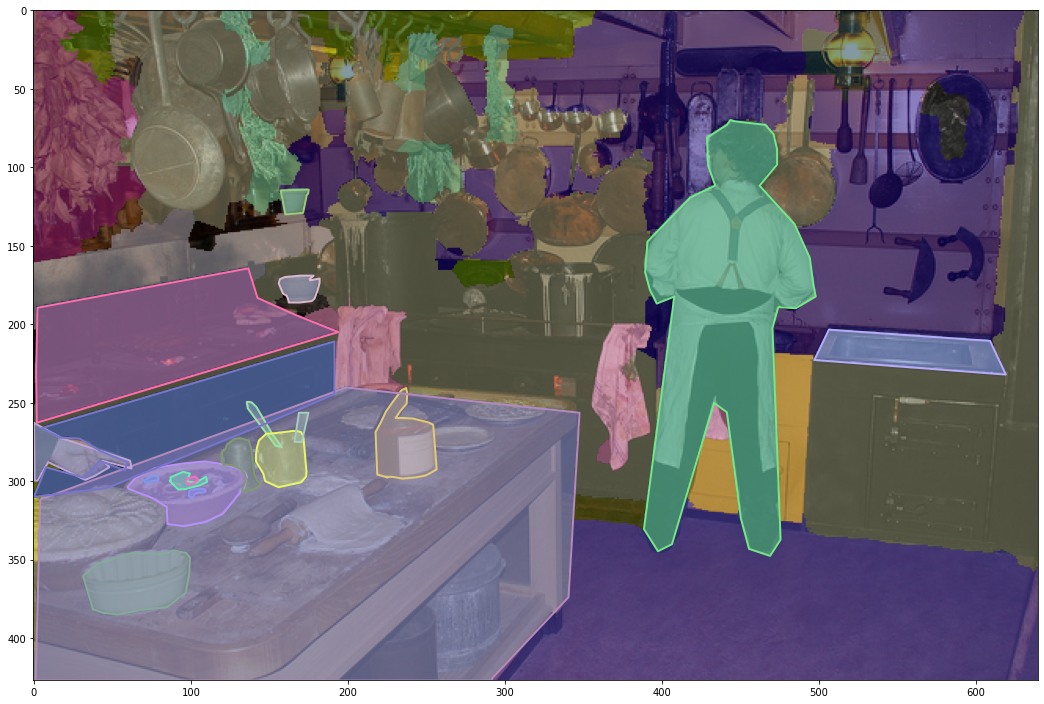

In [6]:
plt.figure(figsize=[18,18])
plt.imshow(img)
coco_stuff.showAnns(anns_stuff_json_list)
coco_class.showAnns(anns_class_json_list)

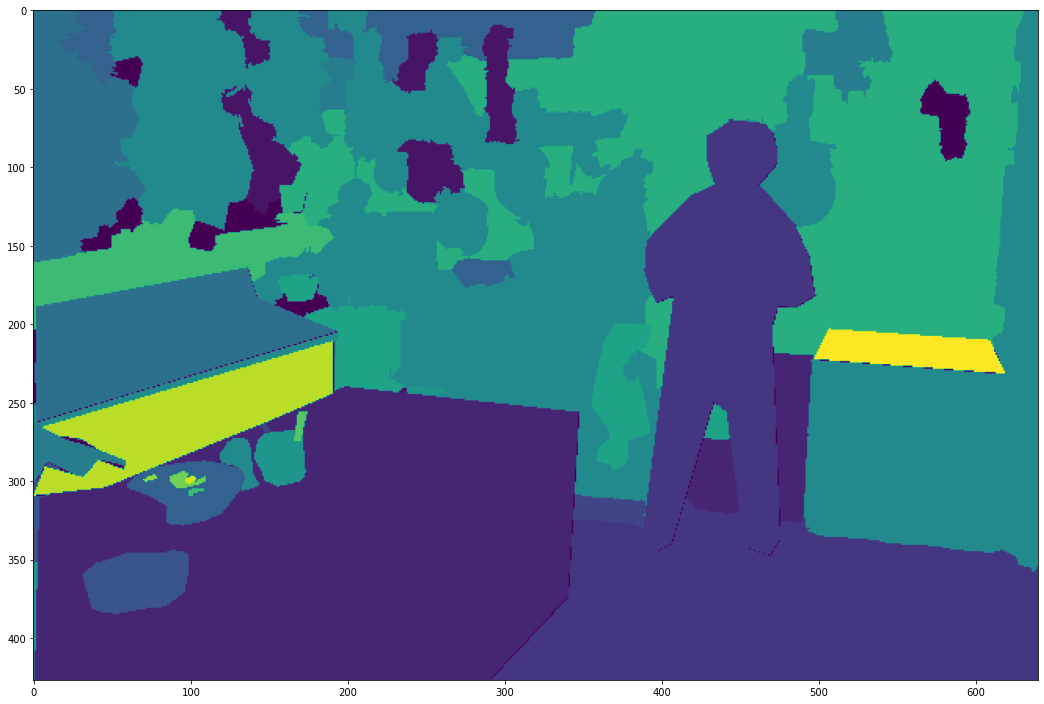

In [8]:
# Convert annotations to numpy array
img_ann = np.zeros((img.height, img.width), dtype=np.uint8)
for idx, ann_json in enumerate(anns_stuff_json_list):
    mask = coco_stuff.annToMask(ann_json)
    img_ann[mask==1] = idx+1
    
for idx, ann_json in enumerate(anns_class_json_list):
    mask = coco_class.annToMask(ann_json)
    img_ann[mask==1] = idx+1
    
plt.figure(figsize=[18,18])
plt.imshow(img_ann)

There are 90 images in the category.


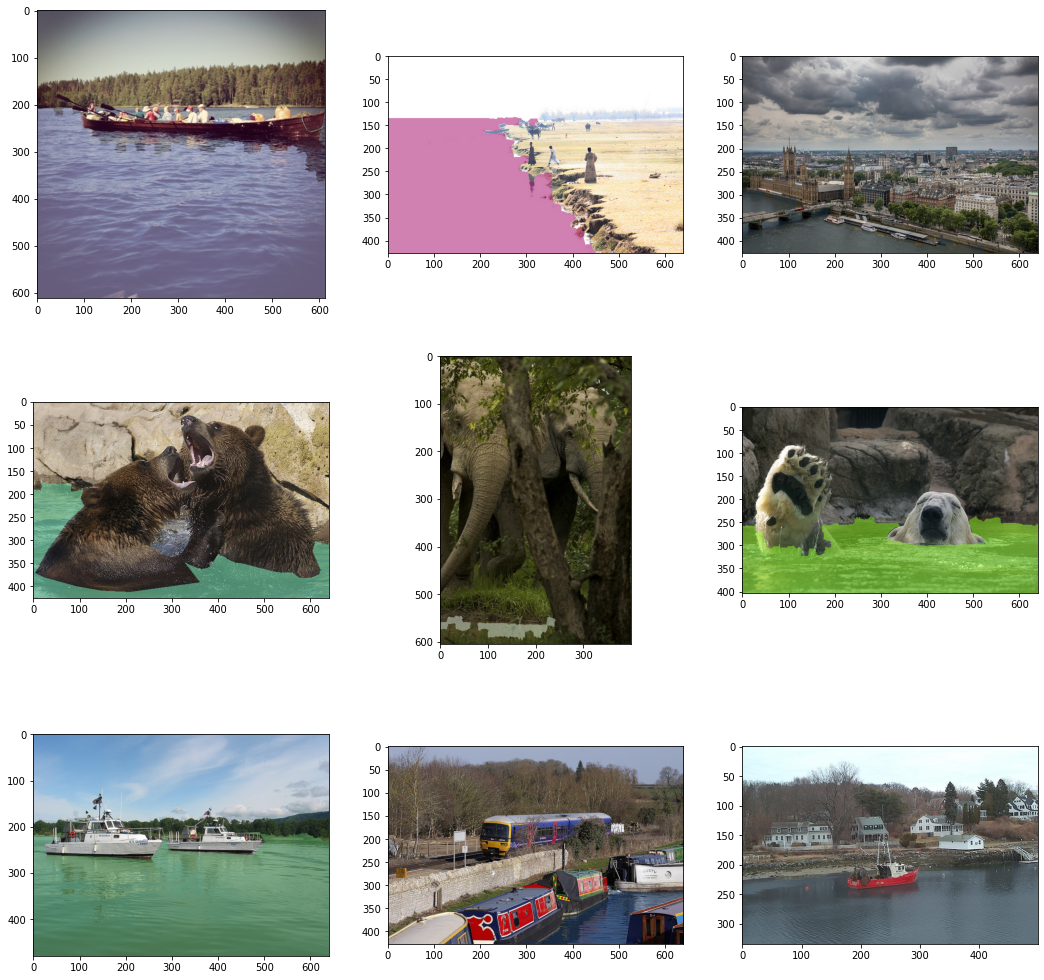

In [70]:
def subplot_size(num_plots):
    
    num_rows = int(np.sqrt(num_plots))
    frac = num_plots/num_rows
    num_cols = int(frac)
    if (frac-num_cols)>1e-10:
        num_cols += 1
    
    return num_rows, num_cols

def plot_some_images(coco, cat_name, img_folder, num_imgs=1):
    '''Plot `num_imgs` images from a given coco category'''
    
    cat_id = coco_stuff.getCatIds(catNms=cat_name)
    img_ids = coco_stuff.getImgIds(catIds=cat_id)
    print(f'There are {len(img_ids)} images in the category.')
    
    imgs_json = coco.loadImgs(img_ids)
    sel_imgs_json = np.random.choice(imgs_json, num_imgs, replace=False)
    
    subplot_shape = subplot_size(num_imgs)
    plt.figure(figsize=[18,18])
    for idx, img_json in enumerate(sel_imgs_json):
        img = Image.open(img_folder/img_json['file_name'])
        img_id = img_json['id']
        ann_ids = coco.getAnnIds(imgIds=img_id, catIds=cat_id)
        anns_json = coco.loadAnns(ann_ids)
        plt.subplot(subplot_shape[0], subplot_shape[1], idx+1)
        plt.imshow(img)
        coco.showAnns(anns_json)
        
cat_name = 'river'
num_imgs = 9
plot_some_images(coco_stuff, cat_name, img_folder, num_imgs=num_imgs)

In [71]:
def save_imgs_from_category(coco, cat_name, img_folder, out_folder):
    '''Save all images and labels from a given coco category '''
    
    out_folder = Path(out_folder)
    
    out_folder_img = out_folder/'images/'
    out_folder_label = out_folder/'labels/'
    if not out_folder.exists():
        os.mkdir(out_folder)
    if not out_folder_img.exists():
        os.mkdir(out_folder_img)
    if not out_folder_label.exists():
        os.mkdir(out_folder_label)
    
    cat_id = coco_stuff.getCatIds(catNms=cat_name)
    img_ids = coco_stuff.getImgIds(catIds=cat_id)
    print(f'There are {len(img_ids)} images in the category.')
    
    imgs_json = coco.loadImgs(img_ids)

    for idx, img_json in enumerate(imgs_json):
        file_name = img_json['file_name']
        img = Image.open(img_folder/file_name)
        img_id = img_json['id']
        ann_ids = coco.getAnnIds(imgIds=img_id, catIds=cat_id)
        anns_json = coco.loadAnns(ann_ids)
        img_ann = np.zeros((img.height, img.width), dtype=np.uint8)
        for idx, ann_json in enumerate(anns_json):
            mask = coco_stuff.annToMask(ann_json)
            img_ann[mask==1] = 255
        
        img.save(out_folder_img/file_name)
        img_ann_pil = Image.fromarray(img_ann)
        file_name_ann = file_name.replace('.jpg', '.png').replace('.jpeg', '.png')
        img_ann_pil.save(out_folder_label/file_name_ann)
        
save_imgs_from_category(coco_stuff, 'river', img_folder, 'river/val')        

There are 90 images in the category.


In [88]:
def get_cats_stats(coco):
    
    cat_ids = coco.getCatIds()
    cats_json = coco.loadCats(cat_ids)
    cat_dict = {}
    for cat_json in cats_json:
        img_ids = coco_stuff.getImgIds(catIds=cat_json['id'])
        cat_dict[cat_json['name']] = len(img_ids)
        
    cat_dict_sorted = dict(sorted(cat_dict.items(), key=lambda x:x[1], reverse=True))
        
    return cat_dict_sorted

cat_dict = get_cats_stats(coco_stuff)
cat_dict

{'other': 117266,
 'tree': 36466,
 'sky-other': 31808,
 'wall-concrete': 31481,
 'clothes': 27657,
 'building-other': 23021,
 'grass': 22575,
 'metal': 22526,
 'wall-other': 19095,
 'pavement': 18311,
 'furniture-other': 17882,
 'table': 16282,
 'road': 15402,
 'window-other': 14209,
 'textile-other': 13052,
 'light': 11772,
 'fence': 11303,
 'plastic': 11137,
 'ceiling-other': 10546,
 'dirt': 10163,
 'clouds': 9886,
 'bush': 9849,
 'plant-other': 9522,
 'paper': 9521,
 'door-stuff': 9475,
 'floor-other': 8893,
 'cabinet': 7176,
 'food-other': 6672,
 'wall-wood': 6642,
 'floor-tile': 6618,
 'sea': 6598,
 'house': 6549,
 'floor-wood': 6324,
 'ground-other': 6252,
 'wall-tile': 5290,
 'playingfield': 5251,
 'wall-brick': 5246,
 'snow': 5114,
 'curtain': 5101,
 'wood': 5053,
 'mountain': 4887,
 'carpet': 4858,
 'sand': 4688,
 'counter': 4589,
 'shelf': 4589,
 'roof': 4490,
 'banner': 4135,
 'cardboard': 3787,
 'mirror-stuff': 3622,
 'rock': 3397,
 'flower': 3259,
 'leaves': 3169,
 'cloth'